<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сборный-проект---2" data-toc-modified-id="Сборный-проект---2-1">Сборный проект - 2</a></span><ul class="toc-item"><li><span><a href="#Загружаем-и-подготавливаем-данные" data-toc-modified-id="Загружаем-и-подготавливаем-данные-1.1">Загружаем и подготавливаем данные</a></span><ul class="toc-item"><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.1.1">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.1.2">Комментарий от ревьюера v_1</a></span></li></ul></li><li><span><a href="#Изучим-и-проверим-данные-в-логах" data-toc-modified-id="Изучим-и-проверим-данные-в-логах-1.2">Изучим и проверим данные в логах</a></span><ul class="toc-item"><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.2.1">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.2.2">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.2.3">Комментарий от ревьюера v_1</a></span></li></ul></li><li><span><a href="#Изучим-воронку-событий" data-toc-modified-id="Изучим-воронку-событий-1.3">Изучим воронку событий</a></span><ul class="toc-item"><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.3.1">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.3.2">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.3.3">Комментарий от ревьюера v_1</a></span></li></ul></li><li><span><a href="#Изучаем-результат-эксперимента" data-toc-modified-id="Изучаем-результат-эксперимента-1.4">Изучаем результат эксперимента</a></span><ul class="toc-item"><li><span><a href="#Комментарий-студента:-Изменил-расчет-статистической-значимости,-правда-результат-не-изменился))" data-toc-modified-id="Комментарий-студента:-Изменил-расчет-статистической-значимости,-правда-результат-не-изменился))-1.4.1">Комментарий студента: Изменил расчет статистической значимости, правда результат не изменился))</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.4.2">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.4.3">Комментарий от ревьюера v_1</a></span></li><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.4.4">Комментарий от ревьюера v_1</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.5">Выводы</a></span><ul class="toc-item"><li><span><a href="#Комментарий-от-ревьюера-v_1" data-toc-modified-id="Комментарий-от-ревьюера-v_1-1.5.1">Комментарий от ревьюера v_1</a></span></li></ul></li></ul></li></ul></div>

# Сборный проект - 2

Цель данного проекта изучить поведение пользователей мобильного приложения по продаже продуктов питания.
Мы изучим воронку продаж, исследуем как пользователи доходят до покупки, сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагахи на каких именно.
После этого мы исследуем результаты A/A/B-эксперимента для фичи "Изменение шрифта во всём приложении". Пользователи разбиты на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми.

Информация о датасете /datasets/logs_exp.csv: 
* Каждая запись в логе — это действие пользователя, или событие. 
* EventName — название события;
* DeviceIDHash — уникальный идентификатор пользователя;
* EventTimestamp — время события;
* ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

Загружаем необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math as mth

## Загружаем и подготавливаем данные

In [2]:
logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Проверим датасет на наличие пропусков и я дубликатов

In [4]:
logs.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [5]:
logs.duplicated().sum()

413

In [6]:
logs[logs.duplicated(keep=False)]

,EventName,DeviceIDHash,EventTimestamp,ExpId
452,MainScreenAppear,5613408041324010552,1564474784,248
453,MainScreenAppear,5613408041324010552,1564474784,248
2348,CartScreenAppear,1694940645335807244,1564609899,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3572,MainScreenAppear,434103746454591587,1564628377,248
...,...,...,...,...
242359,PaymentScreenSuccessful,2382591782303281935,1565206049,246
242360,PaymentScreenSuccessful,2382591782303281935,1565206049,246
242362,CartScreenAppear,2382591782303281935,1565206049,246
242634,MainScreenAppear,4097782667445790512,1565206618,246


Всего 413 дубликатов, удалим их

In [7]:
logs = logs.drop_duplicates()

In [8]:
logs.duplicated().sum()

0

Изменим названия столбцов, разберемся с типом данных и сделаем новые столбцы с датами

In [9]:
logs.columns = ['event', 'id', 'dtime', 'experiment']

Переведем дату из Unix формата в datetime

In [10]:
logs.dtime = pd.to_datetime(logs.dtime, unit='s')

In [11]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       243713 non-null  object        
 1   id          243713 non-null  int64         
 2   dtime       243713 non-null  datetime64[ns]
 3   experiment  243713 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 9.3+ MB


Добавим колонку с датами

In [12]:
logs['date'] = pd.to_datetime(logs.dtime.dt.date)

In [13]:
logs.head()

,event,id,dtime,experiment,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


## Изучим и проверим данные в логах

In [14]:
logs.event.unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Всего 4 типа событий: открытие главного экрана, экран успешной оплаты, экран корзины, экран товара, обучение

In [15]:
logs.id.nunique()

7551

Всего 7551 пользователь

In [16]:
logs.groupby('id')['event'].count().mean()

32.27559263673685

В среднем на пользователя приходится 32.3 события

Проверим за какие даты мы имеем данные.

In [17]:
logs.date.describe()

/tmp/ipykernel_87/3300205688.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logs.date.describe()


count                  243713
unique                     14
top       2019-08-01 00:00:00
freq                    36141
first     2019-07-25 00:00:00
last      2019-08-07 00:00:00
Name: date, dtype: object

У нас имеются данные за период с 25.07.2019 по 07.08.2019. Т.е. за 14 дней

Построим график распределения событий по времени.

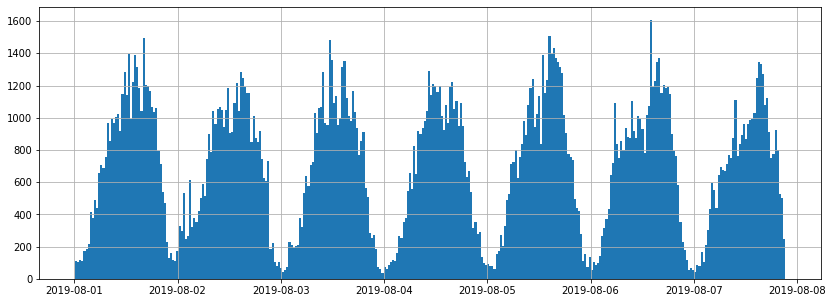

In [51]:
logs['dtime'].hist(bins=14*24, figsize=(14, 5));

In [19]:
logs[logs.date > '2019-07-31'].shape[0]

240887

In [20]:
logs[~(logs.date > '2019-07-31')].shape[0]

2826

In [21]:
(logs[(logs.date < '2019-07-31')].id.isin(logs[logs.date > '2019-07-31'].id) == False).sum()

19

Установив порог даты в 01.08.2019, мы потеряли 2826 записей и 19 пользователей

In [22]:
logs = logs[logs.date > '2019-07-31']

In [23]:
logs.groupby('experiment')['id'].count()

experiment
246    79302
247    77022
248    84563
Name: id, dtype: int64

В каждой группе имеется схожее количество записей.

## Изучим воронку событий

In [24]:
logs.groupby('event', as_index=False)['id'].count().sort_values(by='id', ascending=False)

,event,id
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


По частоте события расположены вполен закономерно, сначала идет главное окно, затем окно товара, после него окно корзины и окно успешной оплаты. А вот обучение идет в самом конце и видимо не пользуется большим спросом.

In [25]:
funnel = logs.groupby('event', as_index=False)['id'].nunique().sort_values(by='id', ascending=False).reset_index(drop=True)
funnel

,event,id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


Порядок событий по числу уникальных пользователей, которые это событие совершили сходно с таковым по количеству событий.

Проверим долю пользователей, который хоть раз совершали событие

In [26]:
funnel['rate_com'] = round(funnel.apply(lambda x: x[1] / logs.id.nunique(), axis=1),2)
funnel

,event,id,rate_com
0,MainScreenAppear,7419,0.98
1,OffersScreenAppear,4593,0.61
2,CartScreenAppear,3734,0.50
3,PaymentScreenSuccessful,3539,0.47
4,Tutorial,840,0.11


Воронка событий выстраивается следующим образом: Сначала пользователей попадает на главный экран, затем заходит на страницу товара, после чего добавляет его в корзину и наконец оплачивает его. Обучение в воронку не входит, так как пользователь может совершать покупку и другие дествия из воронки вне зависимости от того, прошел ли он обучение.

In [27]:
funnel.drop(4, inplace=True)

In [28]:
funnel['funnel_rate'] = 1
funnel['funnel_rate_consequence'] = 1
for i in funnel.iterrows():
    if i[0] > 0 :
        funnel.loc[i[0], 'funnel_rate'] = round(funnel.id[i[0]] / funnel.id[i[0]-1],2)
        funnel.loc[i[0], 'funnel_rate_consequence'] = round(funnel.funnel_rate[i[0]] * funnel.funnel_rate_consequence[i[0]-1],2)

funnel_rate - доля пользователей перешедших с прошлой стадии воронки. funnel_rate_consequence - доля пользователей дошедших до воронки от ее начала

In [29]:
funnel

,event,id,rate_com,funnel_rate,funnel_rate_consequence
0,MainScreenAppear,7419,0.98,1.00,1.00
1,OffersScreenAppear,4593,0.61,0.62,0.62
2,CartScreenAppear,3734,0.50,0.81,0.50
3,PaymentScreenSuccessful,3539,0.47,0.95,0.48


Больше всего пользователей отпадает на стадии выбора продукта. До конца воронки доходят 48% пользователей

## Изучаем результат эксперимента

Уберем из датасета событие Tutorial, т.к оно не влияет на воронку продаж

In [30]:
logs = logs[logs.event != 'Tutorial']

Определим кол-во пользователей в каждой группе

In [31]:
logs.groupby('experiment', as_index = False)['id'].nunique()

,experiment,id
0,246,2483
1,247,2512
2,248,2535


В группе 246 - 2483 пользователя, в группе 247 - 2512, а в группе 248 - 2535

Посчитаем общее кол-во пользователей в группе(потом пригодится)

In [32]:
total = {246 : logs[logs.experiment == 246].id.nunique(), 247 : logs[logs.experiment == 247].id.nunique(), 248 : logs[logs.experiment == 248].id.nunique(), 245 : logs[logs.experiment == 246].id.nunique() + logs[logs.experiment == 247].id.nunique()}


Создадим датасеты с данными по всем группам

In [33]:
logs

,event,id,dtime,experiment,date
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [34]:
log_a_1 = logs[logs.experiment == 246].pivot_table(index='id', columns='event', values='date', aggfunc='count').reset_index().fillna(0)
log_a_2 = logs[logs.experiment == 247].pivot_table(index='id', columns='event', values='date', aggfunc='count').reset_index().fillna(0)
log_b = logs[logs.experiment == 248].pivot_table(index='id', columns='event', values='date', aggfunc='count').reset_index().fillna(0)

In [35]:
log_a_1 = log_a_1.apply(lambda x: x/x, axis = 1).fillna(0).drop(columns='id')
log_a_2 = log_a_2.apply(lambda x: x/x, axis = 1).fillna(0).drop(columns='id')
log_b = log_b.apply(lambda x: x/x, axis = 1).fillna(0).drop(columns='id')
log_a_1['event'] = 246
log_a_2['event'] = 247
log_b['event'] = 248

In [36]:
log_a_1_2 = pd.concat([log_a_1, log_a_2])
log_a_1_2['event'] = 245

In [37]:
log_a_1.columns

Index(['CartScreenAppear', 'MainScreenAppear', 'OffersScreenAppear',
       'PaymentScreenSuccessful', 'event'],
      dtype='object', name='event')

In [38]:
log_a_1

event,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,event
0,0.0,1.0,0.0,0.0,246
1,1.0,1.0,1.0,1.0,246
2,0.0,1.0,1.0,0.0,246
3,0.0,1.0,1.0,0.0,246
4,1.0,1.0,1.0,1.0,246
...,...,...,...,...,...
2478,0.0,1.0,0.0,0.0,246
2479,1.0,1.0,1.0,1.0,246
2480,1.0,0.0,1.0,1.0,246
2481,1.0,1.0,1.0,0.0,246


Для начала возьмем альфа уровень значимости равен 0.05

In [39]:
alpha = 0.05

Определим функцию для расчета показателей и их статистической значимости

In [40]:
def stat_event(df_a, df_b, event, alpha = alpha):
    p1 = df_a[event].sum() / total[df_a.iloc[0].event]
    p2 = df_b[event].sum() / total[df_b.iloc[0].event]
    p_comb = (df_a[event].sum() + df_b[event].sum()) / (total[df_a.iloc[0].event] + total[df_b.iloc[0].event])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_comb * (1 - p_comb) * (1/total[df_a.iloc[0].event] + 1/total[df_b.iloc[0].event]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2                                                    
    print(f"Число пользователей совершивших действие {event} в группе А : {df_a[event].sum()}")
    print(f"Число пользователей совершивших действие {event} в группе В : {df_b[event].sum()}")
    print(f"Доля пользователей совершивших действие {event} в группе А : {round(p1, 2)}")
    print(f"Доля пользователей совершивших действие {event} в группе В : {round(p2, 2)}")
    print(f"Относительная разница доли пользователей = {round((p2 / p1) - 1 ,3) } p-value = {p_value}")
    if p_value >= alpha:
        print('Разница статистически незначима')
    else:
        print('Разница статистически значима')
    print('')
    return

In [41]:
for i in log_a_1.columns:
    if i != 'event':
        stat_event(log_a_1, log_a_2, i)

Число пользователей совершивших действие CartScreenAppear в группе А : 1266.0
Число пользователей совершивших действие CartScreenAppear в группе В : 1238.0
Доля пользователей совершивших действие CartScreenAppear в группе А : 0.51
Доля пользователей совершивших действие CartScreenAppear в группе В : 0.49
Относительная разница доли пользователей = -0.033 p-value = 0.22867643757335676
Разница статистически незначима

Число пользователей совершивших действие MainScreenAppear в группе А : 2450.0
Число пользователей совершивших действие MainScreenAppear в группе В : 2476.0
Доля пользователей совершивших действие MainScreenAppear в группе А : 0.99
Доля пользователей совершивших действие MainScreenAppear в группе В : 0.99
Относительная разница доли пользователей = -0.001 p-value = 0.7526703436483038
Разница статистически незначима

Число пользователей совершивших действие OffersScreenAppear в группе А : 1542.0
Число пользователей совершивших действие OffersScreenAppear в группе В : 1520.0
Дол

In [42]:
for i in log_a_1.columns:
    if i != 'event':
        stat_event(log_a_1, log_b, i)

Число пользователей совершивших действие CartScreenAppear в группе А : 1266.0
Число пользователей совершивших действие CartScreenAppear в группе В : 1230.0
Доля пользователей совершивших действие CartScreenAppear в группе А : 0.51
Доля пользователей совершивших действие CartScreenAppear в группе В : 0.49
Относительная разница доли пользователей = -0.048 p-value = 0.08067367598823139
Разница статистически незначима

Число пользователей совершивших действие MainScreenAppear в группе А : 2450.0
Число пользователей совершивших действие MainScreenAppear в группе В : 2493.0
Доля пользователей совершивших действие MainScreenAppear в группе А : 0.99
Доля пользователей совершивших действие MainScreenAppear в группе В : 0.98
Относительная разница доли пользователей = -0.003 p-value = 0.3387114076159288
Разница статистически незначима

Число пользователей совершивших действие OffersScreenAppear в группе А : 1542.0
Число пользователей совершивших действие OffersScreenAppear в группе В : 1531.0
Дол

In [43]:
for i in log_a_1.columns:
    if i != 'event':
        stat_event(log_a_2, log_b, i)

Число пользователей совершивших действие CartScreenAppear в группе А : 1238.0
Число пользователей совершивших действие CartScreenAppear в группе В : 1230.0
Доля пользователей совершивших действие CartScreenAppear в группе А : 0.49
Доля пользователей совершивших действие CartScreenAppear в группе В : 0.49
Относительная разница доли пользователей = -0.015 p-value = 0.5878284605111943
Разница статистически незначима

Число пользователей совершивших действие MainScreenAppear в группе А : 2476.0
Число пользователей совершивших действие MainScreenAppear в группе В : 2493.0
Доля пользователей совершивших действие MainScreenAppear в группе А : 0.99
Доля пользователей совершивших действие MainScreenAppear в группе В : 0.98
Относительная разница доли пользователей = -0.002 p-value = 0.5194964354051703
Разница статистически незначима

Число пользователей совершивших действие OffersScreenAppear в группе А : 1520.0
Число пользователей совершивших действие OffersScreenAppear в группе В : 1531.0
Доля

In [44]:
for i in log_a_1.columns:
    if i != 'event':
        stat_event(log_a_1_2, log_b, i)

Число пользователей совершивших действие CartScreenAppear в группе А : 2504.0
Число пользователей совершивших действие CartScreenAppear в группе В : 1230.0
Доля пользователей совершивших действие CartScreenAppear в группе А : 0.5
Доля пользователей совершивших действие CartScreenAppear в группе В : 0.49
Относительная разница доли пользователей = -0.032 p-value = 0.18683558686831558
Разница статистически незначима

Число пользователей совершивших действие MainScreenAppear в группе А : 4926.0
Число пользователей совершивших действие MainScreenAppear в группе В : 2493.0
Доля пользователей совершивших действие MainScreenAppear в группе А : 0.99
Доля пользователей совершивших действие MainScreenAppear в группе В : 0.98
Относительная разница доли пользователей = -0.003 p-value = 0.3486684291093256
Разница статистически незначима

Число пользователей совершивших действие OffersScreenAppear в группе А : 3062.0
Число пользователей совершивших действие OffersScreenAppear в группе В : 1531.0
Доля

В результате 16 тестов не было обнаружено ни одного статистически значимого изменения изучаемых параметров при уровне значимости 0.05

Для определения уровня значимости применим поправку Бонферони: уровень значимости 0.1 поделим на кол-во экспериментов - 16 

In [45]:
alpha = 0.05 / 16
alpha

0.003125

In [46]:
for i in log_a_1.columns:
    if i != 'event':
        stat_event(log_a_1, log_a_2, i)

Число пользователей совершивших действие CartScreenAppear в группе А : 1266.0
Число пользователей совершивших действие CartScreenAppear в группе В : 1238.0
Доля пользователей совершивших действие CartScreenAppear в группе А : 0.51
Доля пользователей совершивших действие CartScreenAppear в группе В : 0.49
Относительная разница доли пользователей = -0.033 p-value = 0.22867643757335676
Разница статистически незначима

Число пользователей совершивших действие MainScreenAppear в группе А : 2450.0
Число пользователей совершивших действие MainScreenAppear в группе В : 2476.0
Доля пользователей совершивших действие MainScreenAppear в группе А : 0.99
Доля пользователей совершивших действие MainScreenAppear в группе В : 0.99
Относительная разница доли пользователей = -0.001 p-value = 0.7526703436483038
Разница статистически незначима

Число пользователей совершивших действие OffersScreenAppear в группе А : 1542.0
Число пользователей совершивших действие OffersScreenAppear в группе В : 1520.0
Дол

In [47]:
for i in log_a_1.columns:
    if i != 'event':
        stat_event(log_a_1, log_b, i)

Число пользователей совершивших действие CartScreenAppear в группе А : 1266.0
Число пользователей совершивших действие CartScreenAppear в группе В : 1230.0
Доля пользователей совершивших действие CartScreenAppear в группе А : 0.51
Доля пользователей совершивших действие CartScreenAppear в группе В : 0.49
Относительная разница доли пользователей = -0.048 p-value = 0.08067367598823139
Разница статистически незначима

Число пользователей совершивших действие MainScreenAppear в группе А : 2450.0
Число пользователей совершивших действие MainScreenAppear в группе В : 2493.0
Доля пользователей совершивших действие MainScreenAppear в группе А : 0.99
Доля пользователей совершивших действие MainScreenAppear в группе В : 0.98
Относительная разница доли пользователей = -0.003 p-value = 0.3387114076159288
Разница статистически незначима

Число пользователей совершивших действие OffersScreenAppear в группе А : 1542.0
Число пользователей совершивших действие OffersScreenAppear в группе В : 1531.0
Дол

In [48]:
for i in log_a_1.columns:
    if i != 'event':
        stat_event(log_a_2, log_b, i)

Число пользователей совершивших действие CartScreenAppear в группе А : 1238.0
Число пользователей совершивших действие CartScreenAppear в группе В : 1230.0
Доля пользователей совершивших действие CartScreenAppear в группе А : 0.49
Доля пользователей совершивших действие CartScreenAppear в группе В : 0.49
Относительная разница доли пользователей = -0.015 p-value = 0.5878284605111943
Разница статистически незначима

Число пользователей совершивших действие MainScreenAppear в группе А : 2476.0
Число пользователей совершивших действие MainScreenAppear в группе В : 2493.0
Доля пользователей совершивших действие MainScreenAppear в группе А : 0.99
Доля пользователей совершивших действие MainScreenAppear в группе В : 0.98
Относительная разница доли пользователей = -0.002 p-value = 0.5194964354051703
Разница статистически незначима

Число пользователей совершивших действие OffersScreenAppear в группе А : 1520.0
Число пользователей совершивших действие OffersScreenAppear в группе В : 1531.0
Доля

In [49]:
for i in log_a_1.columns:
    if i != 'event':
        stat_event(log_a_1_2, log_b, i)

Число пользователей совершивших действие CartScreenAppear в группе А : 2504.0
Число пользователей совершивших действие CartScreenAppear в группе В : 1230.0
Доля пользователей совершивших действие CartScreenAppear в группе А : 0.5
Доля пользователей совершивших действие CartScreenAppear в группе В : 0.49
Относительная разница доли пользователей = -0.032 p-value = 0.18683558686831558
Разница статистически незначима

Число пользователей совершивших действие MainScreenAppear в группе А : 4926.0
Число пользователей совершивших действие MainScreenAppear в группе В : 2493.0
Доля пользователей совершивших действие MainScreenAppear в группе А : 0.99
Доля пользователей совершивших действие MainScreenAppear в группе В : 0.98
Относительная разница доли пользователей = -0.003 p-value = 0.3486684291093256
Разница статистически незначима

Число пользователей совершивших действие OffersScreenAppear в группе А : 3062.0
Число пользователей совершивших действие OffersScreenAppear в группе В : 1531.0
Доля

При применении поправки Бонферони, тестов с статистически значимым результатом так же не появилось, что закономерно.

## Выводы

* Была проведена предобработка данных. Пропусков в датасете нет, удалено 413 дубликатов.
* Для анализа использовалась лишь часть датасета, а именно лог за период с 1 августа по 7 августа. т.е за 1 неделю. Так как за дату раньше 1 августа очень мло данных, и они могут повлиять на результаты исследования. Установив порог даты в 01.08.2019, мы потеряли 2826 записей и 19 пользователей из датасета. В итоге осталось 240887 записей
* Воронка событий выстраивается следующим образом: Сначала пользователей попадает на главный экран, затем заходит на страницу товара, после чего добавляет его в корзину и наконец оплачивает его. Обучение в воронку не входит и поэтому записи с этим событием будут исключены из датасета при анализе результатов теста
* В тесте участвовали: В группе 246 - 2483 пользователя, в группе 247 - 2512, а в группе 248 - 2535
* В тесте исследовалось влияние изменения шрифта на долю пользователей совершивших одно из действий: открытие главного экрана, открытие страницы товара, открытие страницы корзины и успешная оплата.
* Результаты тестов на контрольных группах не показали статистически значимой разницы между группами, что говорит о соблюдении технологии деления на группы.
* Ни при уровне значимости 0.05, ни при уровне значимости 0.003125(после применения поправки Бонферони для 16 тестов) не было обнаруженно статистически значимой разницы между долей пользователей, совершивших любое из исследуемых действий.
* Можно сделать вывод, что изменение шрифта на новый никак не повлияло на воронку продаж, а значит никак не скажется на количестве продаж. 